# Analiza przemówień polskich parlamentarzystów
W zmiennej sejm będziemy przechowywali przemowy.

In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sejm = pd.read_csv('../data/sejm.csv')

In [158]:
sejm.head()

,lemma,text,name,date
0,przystępować do rozpatrzyć punkt 16 . porządek...,Przystępujemy do rozpatrzenia punktu 16. por...,Ewa Kopacz,2011-12-01
1,kto z pani i pan poseł być za przyjąć wniosek ...,Kto z pań i panów posłów jest za przyjęciem w...,Ewa Kopacz,2011-12-01
2,przystępować do rozpatrzyć punkt 15 . porządek...,Przystępujemy do rozpatrzenia punktu 15. por...,Ewa Kopacz,2011-12-01
3,"dziękować bardzo , pan poseł . czy ktoś z pani...","Dziękuję bardzo, panie pośle. Czy ktoś z pań...",Ewa Kopacz,2011-12-01
4,przystępować do rozpatrzyć punkt 17 . porządek...,Przystępujemy do rozpatrzenia punktu 17. por...,Ewa Kopacz,2011-12-01


Ramka zawiera 4 kolumny: imię przemawiającego, datę, tekst przemowy oraz lemma, czyli przekształconą część przemowy

In [159]:
sejm.groupby('name')['text'].count().nsmallest(18)

name
Agnieszka Pachciarz             1
Aldona Młyńczak                 1
Aleksander Sosna                1
Andrzej Smirnow                 1
Beata Rusinowska                1
Czesław Sobierajski             1
Elżbieta Królikowska-Kińska     1
Ewa Czeszejko-Sochacka          1
Irena Tomaszak-Zesiuk           1
Jarosław Tomasz Jagiełło        1
Krzysztof Sońta                 1
Marek Kwitek                    1
Piotr Król                      1
Przemysław Czarnecki            1
Robert Jagła                    1
Teresa Świło                    1
Łukasz Tusk                     1
Dorota Podedworna-Tarnowska    10
Name: text, dtype: int64

In [160]:
sejm[sejm.name == 'Agnieszka Pachciarz']['text']

11947     Dziękuję bardzo.
Name: text, dtype: object

In [161]:
sejm[sejm.name == 'Przemysław Czarnecki']['text']

62585     Ślubuję. Tak mi dopomóż Bóg.
Name: text, dtype: object

Jak się okazuje kilkanaście osób powiedziała tylko jedno zdanie: 'Ślubuję. Tak mi dopomóż Bóg.'. Na słowach przysięgi ich działalność się skończyła. Nie wszyscy jednak spośród kilkunastu osób wypowiadających się tylko raz są posłami. Przykładowo pani Agnieszka Pachciarz, której jedyne słowa wypowiedziane przy mównicy to "Dziękuję bardzo" jest prawniczką, a także była prezesem NFZ w 2013 roku.

In [162]:
filtered = sejm.groupby('name')['text'].filter(lambda x: len(x) >= 10)

In [163]:
sejm = sejm[sejm['text'].isin(filtered)]

In [164]:
sejm.groupby('name')['text'].apply(lambda x: np.mean(x.str.len())).sort_values(ascending=False).nlargest(10)

name
Wojciech Rafał Wiewiórowski    20848.833333
Marek Michalak                 15007.142857
Donald Tusk                    14992.770833
Olgierd Dziekoński             12197.333333
Sławomir Nowak                  9996.300000
Władysław Kosiniak-Kamysz       9174.230769
Piotr Serafin                   8612.800000
Tomasz Siemoniak                8471.545455
Jarosław Gowin                  7785.571429
Jarosław Kaczyński              7489.142857
Name: text, dtype: float64

In [165]:
sejm.text[16]

' Pani Marszałek!  Wysoka Izbo!  Mam prośbę do pani marszałek, mianowicie chodzi o uzasadnienie odmowy przedłożenia Wysokiej Izbie kandydatur panów Mariusza Kamińskiego i Antoniego Macierewicza do Komisji do Spraw Służb Specjalnych.'

## Podział na partie
Zaimportujemy plik .csv z danymi odnośnie przynależności partyjnej każdego z polityków. 

In [166]:
sejm_dict = pd.read_csv('../data/sejm7.csv', delimiter = ';', header=None, usecols = [0,3])
sejm_dict.columns = ['name', 'party']

In [167]:
print(sejm_dict.shape)
sejm_dict.head()

(460, 2)


,name,party
0,Adam Abramowicz,PiS
1,Małgorzata Adamczak,PO
2,Andrzej Adamczyk,PiS
3,Romuald Ajchler,SLD
4,Leszek Aleksandrzak,SLD


In [168]:
sejm = sejm.merge(sejm_dict, how='left')

In [169]:
sejm.head()
sejm.groupby('party')['text'].count()

party
PO       22461
PSL       8347
PiS      15305
RP        9864
SLD       9697
SP        2773
niez.       28
Name: text, dtype: int64

In [170]:
filtered_rows = (sejm['party'].isin(['PO', 'PiS'])) & (sejm['party'].notnull())
sejm = sejm[filtered_rows]
sejm = sejm.reset_index()

In [171]:
sejm.head()

,index,lemma,text,name,date,party
0,0,przystępować do rozpatrzyć punkt 16 . porządek...,Przystępujemy do rozpatrzenia punktu 16. por...,Ewa Kopacz,2011-12-01,PO
1,1,kto z pani i pan poseł być za przyjąć wniosek ...,Kto z pań i panów posłów jest za przyjęciem w...,Ewa Kopacz,2011-12-01,PO
2,2,przystępować do rozpatrzyć punkt 15 . porządek...,Przystępujemy do rozpatrzenia punktu 15. por...,Ewa Kopacz,2011-12-01,PO
3,3,"dziękować bardzo , pan poseł . czy ktoś z pani...","Dziękuję bardzo, panie pośle. Czy ktoś z pań...",Ewa Kopacz,2011-12-01,PO
4,4,przystępować do rozpatrzyć punkt 17 . porządek...,Przystępujemy do rozpatrzenia punktu 17. por...,Ewa Kopacz,2011-12-01,PO


Dane, których używamy są już zlematyzowane, zatem wystarczy je jeszcze tylko trochę uporządkować.

In [172]:
stopwords = pd.read_csv('../data/polish.stopwords.txt', sep='\n', header=None)
stopwords = list(stopwords[0])

In [173]:
stopwords[:10]

['a', 'aby', 'ach', 'acz', 'aczkolwiek', 'aj', 'albo', 'ale', 'alez', 'ależ']

In [174]:
np.any([x=='po' for x in stopwords])

True

In [175]:
stopwords.remove('po')

## Latent Dirichlet Allocation (LDA) in sklearn
Jak czytamy w dokumentacji (http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)

Convert a collection of text documents to a matrix of token counts
This implementation produces a sparse representation of the counts using scipy.sparse.csr_matrix.

Przyjmuje ciąg stringów i metodą fit_transform zwraca macierz wystąpień poszczególnych tokenów.

max_df - część najczęściej występujących wyrazów, które chcemy wyciąć

min_df - część najrzadziej występujących wyrazów, które chcemy wyciąć

stopwords - lista stopwordów, które chcemy ignorować

In [176]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_df=0.3, min_df=0.01, stop_words=stopwords)
cv_X = cv.fit_transform(sejm.lemma)
cv_X

<37766x1363 sparse matrix of type '<class 'numpy.int64'>'
	with 1731866 stored elements in Compressed Sparse Row format>

cv_X jest macierzą rzadką (https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html#scipy.sparse.csr_matrix)

Sparse matrices can be used in arithmetic operations: they support addition, subtraction, multiplication, division, and matrix power.

Advantages of the CSR format

        efficient arithmetic operations CSR + CSR, CSR * CSR, etc.
        efficient row slicing
        fast matrix vector products

Disadvantages of the CSR format

        slow column slicing operations (consider CSC)
        changes to the sparsity structure are expensive (consider LIL or DOK)



Mając w taki sposób przechowywane informacje o każdym słowie możemy zliczyć ile słów jest w sumie.

In [177]:
counts = pd.DataFrame({
    'word': cv.get_feature_names(),
    'count': cv_X.toarray().sum(axis=0)
})
counts.nlargest(10, columns='count')

,count,word
843,45719,rok
729,29417,projekt
568,25896,państwo
316,24278,komisja
714,21782,prawo
922,21734,sprawa
634,21377,polski
647,20788,poprawka
414,20354,móc
592,20182,po


## LDA
Latent Dirichlet Allocation with online variational Bayes algorithm (http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html)

n_componenets - liczba tematów, które chcemy przyporządkować danym

max_iter - maksymalna liczba iteracji (żeby się za długo nie liczyło chyba)

learning_method - 'batch' lub 'online' (używane tylko w metodzie fit). Online jest szybsza, batch używa wszystkich danych treningowych w każdej iteracji EM do zaktualizowania components_.

Na obiekcie lda po wywołaniu metody fit będziemy mogli zobaczyć lda.components_, czyli tablicę wymiaru \[n_components, n_features\], gdzie element (i,j) reprezentuje jak często słowo j jest przypisywane do tematu i.

In [178]:
from sklearn.decomposition import LatentDirichletAllocation

n_components = 10
lda = LatentDirichletAllocation(n_components = n_components, max_iter=5, learning_method='online', random_state=123)
lda.fit(cv_X)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=5, mean_change_tol=0.001,
             n_components=10, n_jobs=1, n_topics=None, perp_tol=0.1,
             random_state=123, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [179]:
lda.components_.shape

(10, 1363)

In [180]:
#feature_names - lista poszczególnych słów
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = 'Topic #%d: ' % topic_idx
        message += ' '.join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [181]:
print_top_words(lda, cv.get_feature_names(), 15)

Topic #0: podatek spółka umowa polska państwo przedsiębiorca podatkowy rynek polski działalność koszt skarb rolnik gospodarczy firma
Topic #1: polski rok polska po zostać swój służba narodowy rzeczpospolita dzień sprawa rada człowiek państwo sejm
Topic #2: komisja projekt sejm sprawozdanie wniosek punkt dyskusja zmiana porządek sprawa dzienny uchwała rozpatrzyć przedstawić numer
Topic #3: projekt prawo zmiana przepis artykuł dotyczyć klub praca sprawa sąd sprawiedliwość osoba zakres postępowanie komisja
Topic #4: pytanie prawo godzina sprawiedliwość obywatelski platforma zabrać zadać wicemarszałek klub odpowiedź sprawa ruch ministerstwo stan
Topic #5: dziecko szkoła zdrowie rodzina rok osoba system rodzic móc program problem pacjent edukacja badanie ministerstwo
Topic #6: rok program droga środek europejski samorząd zostać realizacja rozwój inwestycja dotyczyć zadanie gmina krajowy budowa
Topic #7: rok praca złoty budżet osoba miliard społeczny milion fundusz publiczny wzrost kwota wyd

Powyżej widzimy listę najpopularniejszych słów dla poszczególnych dziesięciu tematów. Przykładowo widzimy, że Topic#2 dotyczy spraw organizacyjnych, Topic#7 bużdżetu i inwestycji. 

In [182]:
?lda.transform

lda.transform(X) przyjmuje macierz X. "Transform data X according to the fitted model." Dostejmy na wyjściu prawdopodobieństwa, że dane wystąpienie ma poszczególny temat.

In [183]:
lda_features = lda.transform(cv_X)

In [184]:
lda_features.shape

(37766, 10)

In [185]:
lda_features

array([[ 0.00217405,  0.00217411,  0.98043075, ...,  0.00217416,
         0.00217463,  0.00217445],
       [ 0.00212788,  0.14224356,  0.50937233, ...,  0.00212791,
         0.33348868,  0.00212786],
       [ 0.00158742,  0.11522314,  0.32987892, ...,  0.00158746,
         0.00158753,  0.00158747],
       ..., 
       [ 0.103079  ,  0.48039337,  0.00227313, ...,  0.00227325,
         0.00227337,  0.36645637],
       [ 0.00238128,  0.00238164,  0.00238108, ...,  0.0023814 ,
         0.00238125,  0.68689595],
       [ 0.02000187,  0.02000013,  0.02000128, ...,  0.02000093,
         0.02      ,  0.02000065]])

In [186]:
cv_X

<37766x1363 sparse matrix of type '<class 'numpy.int64'>'
	with 1731866 stored elements in Compressed Sparse Row format>

In [187]:
np.array(sejm.text)[-3]

' Panie Marszałku! Panie Ministrze! Wysoka Izbo! To było bardzo ważne wystąpienie pokazujące aktywność polityki zagranicznej w dziedzinie dyplomacji gospodarczej. To, że stawia pan na misje gospodarcze, na to, żeby polscy przedsiębiorcy byli obecni w przestrzeni świata, jest bardzo ważne. Ważne jest także zapowiadane przez pana budowanie marki Polski. Jako przewodniczący grupy Brazylia – Polska mam konkretną ofertę, panie ministrze: oto strona brazylijska jest gotowa przyjąć u siebie wielu doktorantów z Polski, a zarazem jest gotowa skierować na polskie uczelnie od 2015 r. wielu, wielu studentów. Tylko jest jeden warunek, żeby ci studenci chcieli przyjechać do Polski, a nie wybrali np. Czech, Francji czy Bułgarii. Tak więc, panie ministrze, budujmy markę , budujmy również markę Polski na uczelniach, w tym na uczelniach brazylijskich, po to, żeby znajdowali oni adresy w Polsce.'

Możemy się przyjrzeć jak prezentuje się trzecie od końca przemówienie, które największe prawdopodobieństwa osiągnęła dla Topiców o indeksach 1 i 9.

In [188]:
dominant_features = pd.DataFrame({'count':[np.argmax(x) for x in lda_features]})

In [189]:
dominant_features.groupby('count')['count'].count()

count
0    1899
1    1512
2    4478
3    3195
4    9305
5    1699
6    1686
7    1096
8    4994
9    7902
Name: count, dtype: int64

## PiS vs PO
### O czym mówią poszczególne partie?

In [190]:
party_lda = pd.concat([pd.DataFrame(lda_features), sejm['party']], axis=1)

In [191]:
party_lda.shape

(37766, 11)

In [192]:
party_lda.head()

,0,1,2,3,4,5,6,7,8,9,party
0,0.002174,0.002174,0.980431,0.002174,0.002175,0.002174,0.002174,0.002174,0.002175,0.002174,PO
1,0.002128,0.142244,0.509372,0.002128,0.002128,0.002128,0.002128,0.002128,0.333489,0.002128,PO
2,0.001587,0.115223,0.329879,0.313384,0.231989,0.001587,0.001588,0.001587,0.001588,0.001587,PO
3,0.004762,0.004763,0.462532,0.106418,0.077085,0.004762,0.004762,0.004762,0.325391,0.004762,PO
4,0.001786,0.082413,0.862438,0.001787,0.001786,0.001786,0.001786,0.042645,0.001786,0.001786,PO


In [193]:
party_topics = party_lda.groupby('party').mean()
party_topics

,0,1,2,3,4,5,6,7,8,9
party,,,,,,,,,,
PO,0.048870,0.046126,0.146792,0.088039,0.218530,0.052412,0.061797,0.035821,0.187605,0.114006
PiS,0.060542,0.080056,0.071812,0.097113,0.212342,0.060858,0.074987,0.060882,0.034849,0.246558


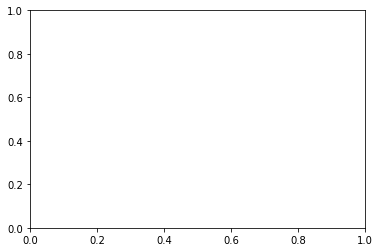

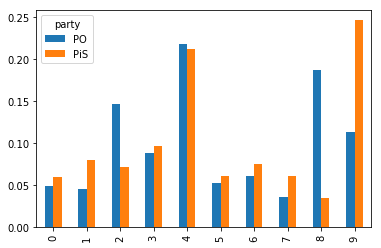

In [194]:
party_topics.transpose().plot.bar()
plt.show()

Nietrudno zauważyć, że PO mówi więcej o sprawach typowo organizacyjnych. Nie jest to nic dziwnego, zważywszy na fakt, że rządziła w tamtej kadencji. Powyższych danych nie należy więc źle interpretować.

### Wizualizacja tematów. PCA
http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space.

In [195]:
party_lda.head()

,0,1,2,3,4,5,6,7,8,9,party
0,0.002174,0.002174,0.980431,0.002174,0.002175,0.002174,0.002174,0.002174,0.002175,0.002174,PO
1,0.002128,0.142244,0.509372,0.002128,0.002128,0.002128,0.002128,0.002128,0.333489,0.002128,PO
2,0.001587,0.115223,0.329879,0.313384,0.231989,0.001587,0.001588,0.001587,0.001588,0.001587,PO
3,0.004762,0.004763,0.462532,0.106418,0.077085,0.004762,0.004762,0.004762,0.325391,0.004762,PO
4,0.001786,0.082413,0.862438,0.001787,0.001786,0.001786,0.001786,0.042645,0.001786,0.001786,PO


### Task 1 - wizualizacja LDA w dwóch wymiarach

In [196]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=123)
party_lda_transformed = pca.fit_transform(X=party_lda.drop('party', axis=1))

In [211]:
colors = party_lda['party'].copy()
colors[party_lda.party=='PO'] = 'orange'
colors[party_lda.party=='PiS'] = 'blue'

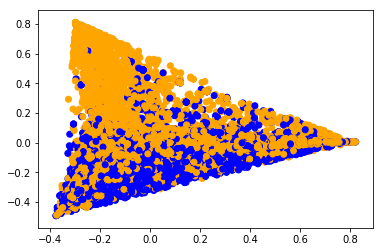

In [212]:
plt.scatter(x=party_lda_transformed[:,0], y=party_lda_transformed[:,1], c=colors)
plt.show()

### Task 2 - Zmiana częstości występowania tematu w czasie

In [287]:
party_lda['date'] = sejm['date']

In [288]:
party_lda.head()

,0,1,2,3,4,5,6,7,8,9,party,date
0,0.002174,0.002174,0.980431,0.002174,0.002175,0.002174,0.002174,0.002174,0.002175,0.002174,PO,2011-12-01
1,0.002128,0.142244,0.509372,0.002128,0.002128,0.002128,0.002128,0.002128,0.333489,0.002128,PO,2011-12-01
2,0.001587,0.115223,0.329879,0.313384,0.231989,0.001587,0.001588,0.001587,0.001588,0.001587,PO,2011-12-01
3,0.004762,0.004763,0.462532,0.106418,0.077085,0.004762,0.004762,0.004762,0.325391,0.004762,PO,2011-12-01
4,0.001786,0.082413,0.862438,0.001787,0.001786,0.001786,0.001786,0.042645,0.001786,0.001786,PO,2011-12-01


In [306]:
date_grouped = party_lda.groupby('date')[0,1,2,3,4,5,6,7,8,9].mean()
date_grouped = pd.DataFrame(date_grouped)
date_grouped.index = pd.to_datetime(date_grouped.index)

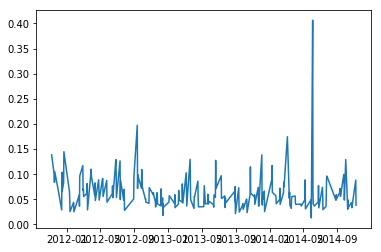

In [307]:
plt.plot(date_grouped[1])
plt.show()

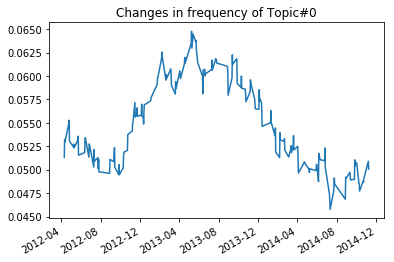

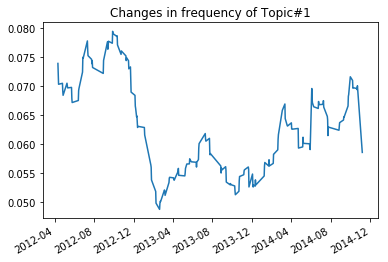

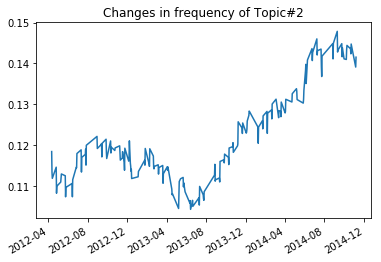

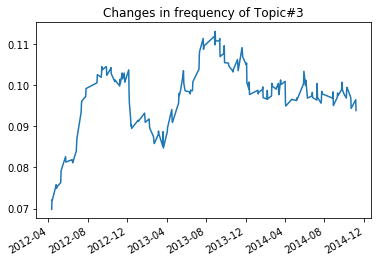

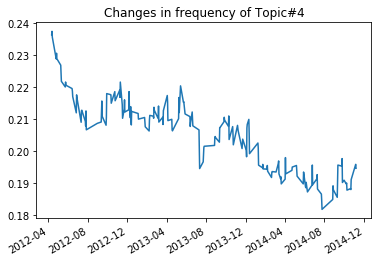

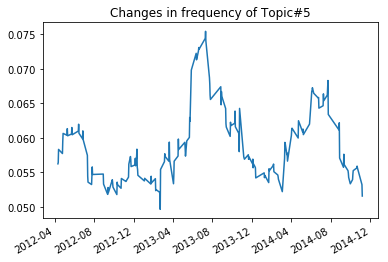

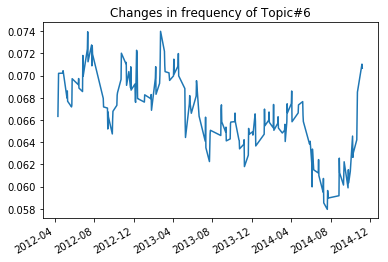

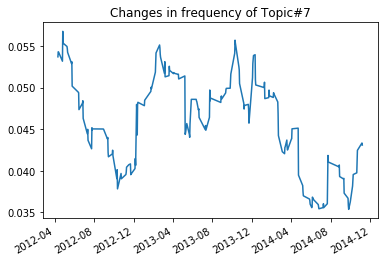

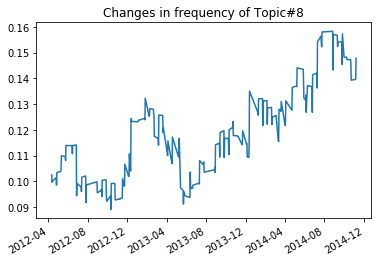

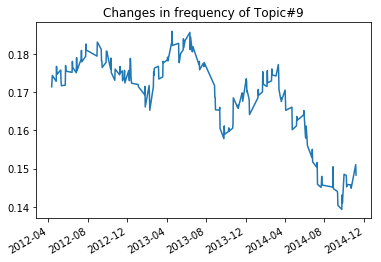

In [316]:
for i in range(10):
 fig, ax = plt.subplots()
 ax.plot(date_grouped[i].rolling(window=30).mean())
 ax.set_title('Changes in frequency of Topic#{}'.format(i))
 fig.autofmt_xdate()
 plt.show()

In [318]:
lda.score(cv_X) #

-18096235.01185913

In [323]:
cv_X

<37766x1363 sparse matrix of type '<class 'numpy.int64'>'
	with 1731866 stored elements in Compressed Sparse Row format>

In [329]:
random_matrix = np.random.rand(37766,1363)
random_matrix

array([[ 0.3927982 ,  0.09762966,  0.4446424 , ...,  0.01220092,
         0.30854637,  0.92035762],
       [ 0.4015376 ,  0.87937143,  0.47646295, ...,  0.20712476,
         0.10366214,  0.56366624],
       [ 0.71456061,  0.72623545,  0.81895802, ...,  0.6020644 ,
         0.69520918,  0.64530505],
       ..., 
       [ 0.34493972,  0.60729596,  0.20753729, ...,  0.84654497,
         0.47726443,  0.49088223],
       [ 0.7993907 ,  0.34669547,  0.67475535, ...,  0.96676365,
         0.77272394,  0.2063817 ],
       [ 0.83768608,  0.28826364,  0.53790737, ...,  0.21885674,
         0.46192596,  0.75565336]])

In [330]:
lda.score(random_matrix)

-197249986.96176791